In [1]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table
import random as random


import numpy as np


In [2]:
board_rows = 8
board_columns = 24

#placement of start, end, lose state, etc.



blank_reward = 0
litter_reward = 1
obstacle_reward = -1

end_reward = 5






def fwd_board_maker():
    board = np.zeros((board_rows,board_columns))

    board[0, :] = 0
    board[7, : ] = 0

    ## last column is goal
    board[:,board_columns-1] = end_reward
    return board



def litter_board_maker(seed_number):
#generate state space and reward space
    board = np.zeros((board_rows,board_columns))
    np.random.seed(seed_number)
    
    rewards = (blank_reward, litter_reward )
    
    occurrence_probabilities = [0.9, 0.1]

    for i in range(board_rows):
        for j in range(board_columns):
            # randomly select from (0, 6, -1) for each board[i,j] 
            board[i,j] = np.random.choice(rewards, p= occurrence_probabilities)


    #buffer "grass" columns

    board[0, :] = 0
    board[7, : ] = 0

    ## last column is goal
    board[:,board_columns-1] = end_reward
    return board



def grass_board_maker(seed_number):
#generate state space and reward space
    board = np.zeros((board_rows,board_columns))
    np.random.seed(seed_number)

   # for i in range(board_rows):
    #    for j in range(board_columns):
            # randomly select from (0, 6, -1) for each board[i,j] 
     #       board[i,j] = np.random.choice(rewards, p= occurrence_probabilities)


    #buffer "grass" columns

    board[0, :] = -1
    board[7, : ] = -1

    ## last column is goal
    board[:,board_columns-1] = end_reward
    return board


def obstacle_board_maker(seed_number):
#generate state space and reward space
    board = np.zeros((board_rows,board_columns))
    np.random.seed(seed_number)
    
    rewards = (blank_reward, obstacle_reward )
    
    occurrence_probabilities = [0.9, 0.1]

    for i in range(board_rows):
        for j in range(board_columns):
            # randomly select from (0, 6, -1) for each board[i,j] 
            board[i,j] = np.random.choice(rewards, p= occurrence_probabilities)


    #buffer "grass" columns

    board[0, :] = 0
    board[7, : ] = 0

    ## last column is goal
    board[:,board_columns-1] = end_reward
    return board







In [3]:


def reward_matrix(board):
    reward_matrix = np.zeros((board_rows, board_columns, 5))
    



In [4]:
def fwd_reward_matrix(random_board):
    forward_reward_matrix = np.zeros((board_rows, board_columns, 5))
    
    forward_reward_matrix[:, 0:board_columns-2 , 2:4] = end_reward  #reward of plus 2 for moving R, D, AD towards end
    
    return forward_reward_matrix

#does not really need random board to be passed into it because last column is always 10




In [5]:
def grass_reward_matrix(random_board):
    grass_reward_matrix = np.zeros((board_rows, board_columns, 5))
    
    #upper bounds, if near upper bound grass and choose up, negative reward
    grass_reward_matrix[1, :, 0] = -1

# 0 = "up", 1 = "down",  2 = "right", 3 = "anti - diagonal", 4 =  "diagonal" in Q matrix action space 
    
    
    # if above bottom grass boarder and move down, negative rewards
    
    grass_reward_matrix[board_rows - 2, : , 1 ] = -1
    
    #end goal reward

    grass_reward_matrix[:, 0:board_columns-2 , 2:4] += end_reward
    
    
    return grass_reward_matrix
    
    
#does not really need random board to be passed into it because upper and lower columns always grass




In [6]:
def litter_reward_matrix(random_board):
    litter_reward_matrix = np.zeros((board_rows, board_columns, 5))
    
    for i in range(board_rows):
        for j in range(board_columns):
            
            if random_board[i,j]==litter_reward:
               litter_reward_matrix[i, j+1, 0] = litter_reward  #move up from below litter
               litter_reward_matrix[i-1, j-1, 4] = litter_reward # move diag from SW
               litter_reward_matrix[i-1, j+1, 2] = litter_reward # move right from W
               litter_reward_matrix[i-1, j-1, 3] = litter_reward # move AD from NW
               litter_reward_matrix[i, j-1, 1] = litter_reward  #Move down from above
    
    
    #end goal reward
            
    litter_reward_matrix[:, 0:board_columns-2 , 2:4] += end_reward
    return litter_reward_matrix

    
    

In [7]:
def obstacle_reward_matrix(random_board):
    obstacle_reward_matrix = np.zeros((board_rows, board_columns, 5))
    
    for i in range(board_rows):
        for j in range(board_columns):
            
            if (random_board[i,j]==obstacle_reward):
               obstacle_reward_matrix[i, j+1, 0] = obstacle_reward  #move up from below litter
               obstacle_reward_matrix[i-1, j-1, 4] = obstacle_reward # move diag from SW
               obstacle_reward_matrix[i-1, j+1, 2] = obstacle_reward # move right from W
               obstacle_reward_matrix[i-1, j-1, 3] = obstacle_reward # move AD from NW
               obstacle_reward_matrix[i, j-1, 1] = obstacle_reward  #Move down from above
    
    #end goal reward
    obstacle_reward_matrix[:, 0:board_columns-2 , 2:4] += end_reward
        
    return obstacle_reward_matrix

In [45]:
def combined_reward_matrix(random_board):
    combined_reward_matrix = np.zeros((board_rows, board_columns, 5))
    
    for i in range(board_rows):
        for j in range(board_columns):
            
            if (random_board[i,j]==obstacle_reward):
               combined_reward_matrix[i, j+1, 0] = obstacle_reward  #move up from below litter
               combined_reward_matrix[i-1, j-1, 4] = obstacle_reward # move diag from SW
               combined_reward_matrix[i-1, j+1, 2] = obstacle_reward # move right from W
               combined_reward_matrix[i-1, j-1, 3] = obstacle_reward # move AD from NW
               combined_reward_matrix[i, j-1, 1] = obstacle_reward  #Move down from above
    
            if random_board[i,j]==litter_reward:
               combined_reward_matrix[i, j+1, 0] = litter_reward  #move up from below litter
               combined_reward_matrix[i-1, j-1, 4] = litter_reward # move diag from SW
               combined_reward_matrix[i-1, j+1, 2] = litter_reward # move right from W
               combined_reward_matrix[i-1, j-1, 3] = litter_reward # move AD from NW
               combined_reward_matrix[i, j-1, 1] = litter_reward  #Move down from above        
    
    #end goal reward
    combined_reward_matrix[:, 0:board_columns-2 , 2:4] += end_reward
    
    #grass reward
    combined_reward_matrix[:, 0:board_columns-2 , 2:4] += end_reward

        
    return combined_reward_matrix


In [9]:
def Q_value_update( state_row, state_column, reward_matrix):
     
    
    directions = [0,1,2,3,4]      #("up", "down", "forward", "anti-diagonal", "diagonal")
    
    # candidate next states
    
        
    forward_a = Q_matrix[state_row, state_column, 0] #forward
    down_a = Q_matrix[state_row, state_column, 1 ] #down
    up_a = Q_matrix[state_row, state_column, 2] #up
    anti_diagonal_a = Q_matrix[state_row, state_column, 3] #anti- diagonal
    diagonal_a = Q_matrix[state_row,state_column, 4] #diagonal
    
    if (state_row <7 ) and (state_row != 0):
        next_state_candidates = {"up" :up_a, "down" : down_a, "forward" : forward_a, "anti-diagonal" : anti_diagonal_a, "diagonal" : diagonal_a}
        
        next_state_max_Q = max(next_state_candidates, key = next_state_candidates.get) #return a string telling next state direction

        
        if (next_state_max_Q == "up"):
            action = np.random.choice(directions, p = [0.8, 0.05, 0.05, 0.05, 0.05])
        if (next_state_max_Q == "down"):
            action = np.random.choice(directions, p = [0.05, 0.8, 0.05, 0.05, 0.05])
        if (next_state_max_Q == "forward"):
            action = np.random.choice(directions, p = [0.05, 0.05, 0.8, 0.05, 0.05])
        if (next_state_max_Q == "anti-diagonal"):
            action = np.random.choice(directions, p = [0.05, 0.05, 0.05, 0.8, 0.05])
        if (next_state_max_Q == "diagonal"):
            action = np.random.choice(directions, p = [0.05, 0.05, 0.05, 0.05, 0.8])   
    
    if (state_row ==7 ) :
        next_state_candidates = {"up" :up_a,  "forward" : forward_a, "diagonal" : diagonal_a}
        next_state_max_Q = max(next_state_candidates, key = next_state_candidates.get) #return a string telling next state direction
        
        if (next_state_max_Q == "up"):
            action = np.random.choice(directions, p = [0.8, 0 ,0.1, 0, 0.1])
        
        if (next_state_max_Q == "forward"):
            action = np.random.choice(directions, p = [0.1, 0, 0.8, 0, 0.1])
       
        if (next_state_max_Q == "diagonal"):
            action = np.random.choice(directions, p = [0.1, 0, 0.1, 0, 0.8])   

    if (state_row ==0 ) :
        next_state_candidates =  {"down" : down_a, "forward" : forward_a, "anti-diagonal" : anti_diagonal_a}
        
        next_state_max_Q = max(next_state_candidates, key = next_state_candidates.get) #return a string telling next state direction

        if (next_state_max_Q == "down"):
            action = np.random.choice(directions, p = [0, 0.8, 0.1, 0.1, 0])
        if (next_state_max_Q == "forward"):
            action = np.random.choice(directions, p = [0, 0.1, 0.8, 0.1, 0])
        if (next_state_max_Q == "anti-diagonal"):
            action = np.random.choice(directions, p = [0, 0.1, 0.1, 0.8, 0])
        
    
    
    #choose next state (s') using epsilon greedy
    

    
    
    
    if (action== 0):
       next_state_row = state_row -1
       next_state_column = state_column 
       next_action = 0 
    if (action== 1):
       next_state_row= state_row +1
       next_state_column = state_column 
       next_action = 1 
    if (action== 2):
       next_state_row = state_row
       next_state_column = state_column +1
       next_action = 2 
    if (action== 3):
       next_state_row = state_row + 1
       next_state_column= state_column + 1
       next_action = 3
    if (action== 4):
       next_state_row = state_row -1
       next_state_column = state_column +1
       next_action = 4 
    
   
        
    
   # print(" state_row  " + str(state_row) )
   # print(" state_column  " + str(state_column))
   # print(" action  " + str(action))
   # print(" next_state_row  " + str(next_state_row) )
    #print("  next_state_column " + str(next_state_column) )
    
   
    
   
    delta_Q = ( reward_matrix[state_row,state_column,action] + discount_factor* max(Q_matrix[next_state_row, next_state_column, : ]) - Q_matrix[state_row,state_column, action] )
    Q_value = Q_matrix[state_row,state_column, action] + learning_rate * delta_Q
    Q_matrix[state_row, state_column, action] = Q_value

    
    
    return next_state_row, next_state_column
    

In [47]:
learning_rate = 0.9
discount_factor = 0.5



#define rewards matrix here, rewards matrix requires you to pass a random board into it 



random_board_litter = litter_board_maker(1)
reward_matrix_litter = litter_reward_matrix(random_board_litter)

random_board_fwd = fwd_board_maker()
reward_matrix_fwd = fwd_reward_matrix(random_board_fwd )


random_board_grass = grass_board_maker(2)
reward_matrix_grass = grass_reward_matrix(random_board_grass)



random_board_obstacle = obstacle_board_maker(3)
reward_matrix_obstacle = obstacle_reward_matrix(random_board_obstacle)


reward_matrix_combined = combined_reward_matrix(combined_board)

#print(reward_matrix)

#print("random initial row " + str(random_initial_row))
#print("random_initial_column " + str(random_initial_column))
    


In [12]:
print(np.shape(reward_matrix_litter))

(8, 24, 5)


In [90]:

#reinitialize each Q_matrix module

Q_matrix = np.zeros((board_rows, board_columns, 5))
    


for j in range(1000):
    np.random.seed(j)
    random_initial_row = np.random.choice(np.arange(board_rows-1))
    random_initial_column = np.random.choice(np.arange(board_columns-1))
    
    
    next_state_row, next_state_column = Q_value_update(random_initial_row, random_initial_column,reward_matrix_litter)
    #next_state_row, next_state_column = Q_value_update(random_initial_row, random_initial_column,reward_matrix_fwd)
    #next_state_row, next_state_column = Q_value_update(random_initial_row, random_initial_column,reward_matrix_grass)
    #next_state_row, next_state_column = Q_value_update(random_initial_row, random_initial_column,reward_matrix_obstacle)
    next_state_row, next_state_column = Q_value_update(random_initial_row, random_initial_column,reward_matrix_combined)

    while( next_state_column < 23): #stop at end of board 
      
      next_state_row, next_state_column = Q_value_update(next_state_row, next_state_column,reward_matrix_litter)
      #next_state_row, next_state_column = Q_value_update(next_state_row, next_state_column,reward_matrix_fwd)
      #next_state_row, next_state_column = Q_value_update(next_state_row, next_state_column,reward_matrix_grass)
      #next_state_row, next_state_column = Q_value_update(next_state_row, next_state_column,reward_matrix_obstacle)
      #next_state_row, next_state_column = Q_value_update(next_state_row, next_state_column,reward_matrix_combined)

                
        
    
   # print("episode" + str(j))
    
    

In [91]:
normalizing_constant = np.max(Q_matrix)

Q_matrix = Q_matrix/normalizing_constant

Q_matrix_litter = Q_matrix #stored
#Q_matrix_fwd = Q_matrix # Q_matrix_fwd is stored
#Q_matrix_grass = Q_matrix #stored
#Q_matrix_obstacle = Q_matrix # stored
#Q_matrix_combined = Q_matrix # stored








Q_matrix_combined

array([[[ 0.        ,  0.2575142 ,  0.92081033,  0.88987207,
          0.        ],
        [ 0.        ,  0.37717182,  0.92986139,  0.93156939,
          0.        ],
        [ 0.        ,  0.38243005,  0.93208209,  0.93281736,
          0.        ],
        [ 0.        ,  0.28488515,  0.92609996,  0.94417158,
          0.        ],
        [ 0.        ,  0.35693149,  0.93182621,  0.88738353,
          0.        ],
        [ 0.        ,  0.42102692,  0.93641305,  0.88980801,
          0.        ],
        [ 0.        ,  0.41999118,  0.88507049,  0.9406558 ,
          0.        ],
        [ 0.        ,  0.41625839,  0.88662529,  0.93747622,
          0.        ],
        [ 0.        ,  0.41906437,  0.93441216,  0.93431693,
          0.        ],
        [ 0.        ,  0.42050081,  0.93425036,  0.93832367,
          0.        ],
        [ 0.        ,  0.42149829,  0.93632617,  0.93632622,
          0.        ],
        [ 0.        ,  0.42362822,  0.94047416,  0.94047492,
          0.   

In [92]:
print(Q_matrix_fwd)

[[[0.         0.49908901 0.99185436 0.         0.        ]
  [0.         0.         0.98764499 0.99151788 0.        ]
  [0.         0.49120813 0.99340936 0.99826295 0.        ]
  [0.         0.47936697 0.99872387 0.99775752 0.        ]
  [0.         0.47800501 0.99964133 0.99990796 0.        ]
  [0.         0.49980162 0.99998313 0.99981731 0.        ]
  [0.         0.49819818 1.         0.99982504 0.        ]
  [0.         0.49959352 0.99998598 0.99995003 0.        ]
  [0.         0.49986445 0.99995528 0.99993802 0.        ]
  [0.         0.49992912 0.99989373 0.99987278 0.        ]
  [0.         0.49986038 0.99977269 0.99976102 0.        ]
  [0.         0.49975259 0.99952855 0.99952754 0.        ]
  [0.         0.49951898 0.99904026 0.99903855 0.        ]
  [0.         0.49903013 0.99806368 0.99806368 0.        ]
  [0.         0.49805526 0.99611052 0.99611052 0.        ]
  [0.         0.4961021  0.99220421 0.99220421 0.        ]
  [0.         0.49219579 0.98439158 0.98439158 0.       

In [93]:
#Combined_Q =  0.25*(Q_matrix_obstacle +Q_matrix_grass + Q_matrix_litter + Q_matrix_fwd)




In [94]:
#combined_board = random_board_litter + random_board_fwd + random_board_grass + random_board_obstacle



In [95]:

def reducer(source_matrix):
    reduced_Q_matrix = np.empty((board_rows, board_columns))

    for i in range(board_rows):
        for j in range(board_columns):
           #reduced_Q_matrix[i,j] = np.argmax(Q_matrix[i,j])  
           reduced_Q_matrix[i,j] = np.argmax(source_matrix[i,j])
    return reduced_Q_matrix
 



In [96]:
#reduced_Q_matrix_combined = reducer(Combined_Q)

#reduced_Q_matrix_combined 

In [97]:
#reduced_Q_matrix_whole_board = reducer(Q_matrix_combined ) 

reduced_Q_matrix_whole_litter = reducer(Q_matrix_litter)

In [98]:
#reduced_Q_matrix_whole_board

In [99]:

def path_mapper(reduced_Q_matrix, start_row, start_column):
    
    reduced_Q_matrix_path = np.zeros((board_rows,board_columns) )

    reduced_Q_matrix_path[start_row,start_column] = 0.7
    new_row = 0
    new_column = 0
  
    while(start_column<22): 
            print( "start_row " + str(start_row))
            print( "start_column " + str(start_column))
            
            if (reduced_Q_matrix[start_row,start_column]==0.):
               new_row = start_row -1
               new_column = start_column 
            if (reduced_Q_matrix[start_row,start_column]==1.):
               new_row= start_row +1
               new_column = start_column 
            if (reduced_Q_matrix[start_row,start_column]==2.):
               new_row = start_row
               new_column = start_column +1
            if (reduced_Q_matrix[start_row,start_column]==3.):
               new_row = start_row + 1
               new_column= start_column + 1
            if (reduced_Q_matrix[start_row,start_column]==4.):
               new_row = start_row -1
               new_column = start_column + 1
            

            reduced_Q_matrix_path[new_row,new_column] = 4
         
            start_row = new_row
            start_column = new_column
            
            print( "start_row " + str(start_row))
            print( "start_column " + str(start_column))
            
            print( "new_row " + str(start_row))
            print( "new_column " + str(start_column))
            
    return reduced_Q_matrix_path



#reduced_Q_matrix_path = path_mapper(reduced_Q_matrix_combined,0,0)
reduced_Q_matrix_whole_litter_path = path_mapper(reduced_Q_matrix_whole_litter,0,0)


reduced_Q_matrix_whole_litter_path

start_row 0
start_column 0
start_row 1
start_column 1
new_row 1
new_column 1
start_row 1
start_column 1
start_row 1
start_column 2
new_row 1
new_column 2
start_row 1
start_column 2
start_row 2
start_column 3
new_row 2
new_column 3
start_row 2
start_column 3
start_row 3
start_column 4
new_row 3
new_column 4
start_row 3
start_column 4
start_row 3
start_column 5
new_row 3
new_column 5
start_row 3
start_column 5
start_row 3
start_column 6
new_row 3
new_column 6
start_row 3
start_column 6
start_row 3
start_column 7
new_row 3
new_column 7
start_row 3
start_column 7
start_row 4
start_column 8
new_row 4
new_column 8
start_row 4
start_column 8
start_row 4
start_column 9
new_row 4
new_column 9
start_row 4
start_column 9
start_row 4
start_column 10
new_row 4
new_column 10
start_row 4
start_column 10
start_row 5
start_column 11
new_row 5
new_column 11
start_row 5
start_column 11
start_row 5
start_column 12
new_row 5
new_column 12
start_row 5
start_column 12
start_row 5
start_column 13
new_row 5
ne

array([[0.7, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 4. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 4. , 4. , 4. , 4. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 4. , 4. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 4. ,
        4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 4. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. 

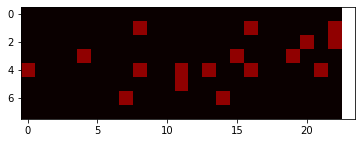

In [100]:
plt.imshow(random_board_litter,cmap = "hot", interpolation='nearest')

#plt. imshow(new_heat,cmap='hot')

#plt.imshow(path_matrix)

plt.show()

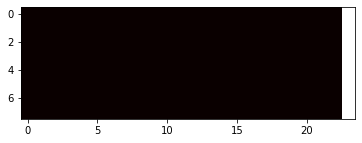

In [101]:
plt.imshow(random_board_fwd,cmap = "hot", interpolation='nearest')

#plt. imshow(new_heat,cmap='hot')

#plt.imshow(path_matrix)

plt.show()

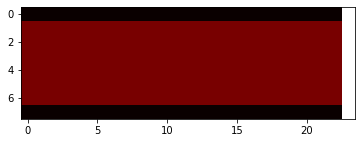

In [102]:
plt.imshow(random_board_grass,cmap = "hot", interpolation='nearest')

#plt. imshow(new_heat,cmap='hot')

#plt.imshow(path_matrix)

plt.show()

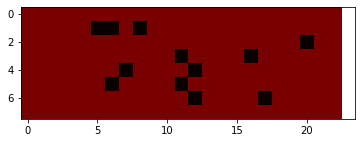

In [103]:
plt.imshow(random_board_obstacle,cmap = "hot", interpolation='nearest')

#plt. imshow(new_heat,cmap='hot')

#plt.imshow(path_matrix)

plt.show()

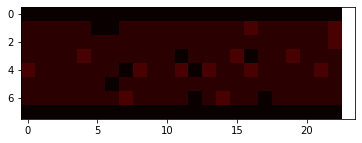

In [104]:
plt.imshow(combined_board,cmap = "hot", interpolation='nearest')

#plt. imshow(new_heat,cmap='hot')

#plt.imshow(path_matrix)

plt.show()

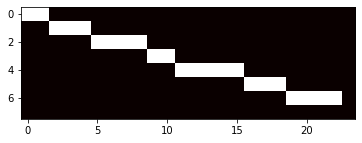

In [105]:

plt.imshow(reduced_Q_matrix_path, cmap = "hot")
plt.show()

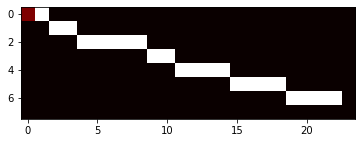

In [106]:




plt.imshow(reduced_Q_matrix_whole_board_path, cmap = "hot")
plt.show()

In [107]:
#overlay not working great, just going to overlay it on ppt

combo = reduced_Q_matrix_whole_board_path +combined_board

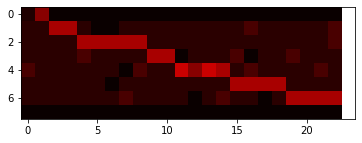

In [108]:
plt.imshow(combo, cmap = "hot")
plt.show()

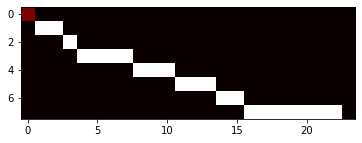

In [109]:
reduced_Q_matrix_whole_litter_path

plt.imshow(reduced_Q_matrix_whole_litter_path, cmap = "hot")
plt.show()